<a href="https://colab.research.google.com/github/SokKanaTorajd/roadque-bangkit21/blob/main/RoadQue_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import os
import cv2

In [2]:
# Download datasets

# this dataset is corrupted. (Japan's train annotations is missing)
# !wget "https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5ty2wb6gvg-1.zip"

# We use this one from different source.
# train dataset
!wget "https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/train.tar.gz"

# test-1 and test-2 datasets
!wget "https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/c7c98ce8-f5df-4fd6-8249-8c327a7228ce/file_downloaded"
!wget "https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/cd7f2818-803d-471b-8a44-4c9aec6bd6ef/file_downloaded"

# file structure
!wget "https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/7c8780cf-ee51-4880-96bc-3fbde24d1483/file_downloaded"

--2021-05-20 11:09:59--  https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/train.tar.gz
Resolving mycityreport.s3-ap-northeast-1.amazonaws.com (mycityreport.s3-ap-northeast-1.amazonaws.com)... 52.219.16.127
Connecting to mycityreport.s3-ap-northeast-1.amazonaws.com (mycityreport.s3-ap-northeast-1.amazonaws.com)|52.219.16.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1472626254 (1.4G) [application/x-tar]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>]   1.37G  9.32MB/s    in 1m 54s  

2021-05-20 11:11:54 (12.4 MB/s) - ‘train.tar.gz’ saved [1472626254/1472626254]

--2021-05-20 11:11:54--  https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/c7c98ce8-f5df-4fd6-8249-8c327a7228ce/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP 

In [ ]:
# # Unzip Datasets
# !unzip 5ty2wb6gvg-1.zip

# Untar train dataset
!tar -xvf train.tar.gz

In [4]:
# count images in each train folder
train_dirs = ['train/Czech/images','train/India/images', 'train/Japan/images']

for dir in train_dirs:
  print('{} contains {} images.'.format(dir,len(os.listdir(dir))))

train/Czech/images contains 2829 images.
train/India/images contains 7706 images.
train/Japan/images contains 10506 images.


In [5]:
image_files = []

for dir in (train_dirs):
  for image in os.listdir(dir):
    image = dir + '/' + image 
    image_files.append(image)

In [6]:
print(len(image_files))
print(image_files[0:5])

21041
['train/Czech/images/Czech_000407.jpg', 'train/Czech/images/Czech_000601.jpg', 'train/Czech/images/Czech_002027.jpg', 'train/Czech/images/Czech_002380.jpg', 'train/Czech/images/Czech_001554.jpg']


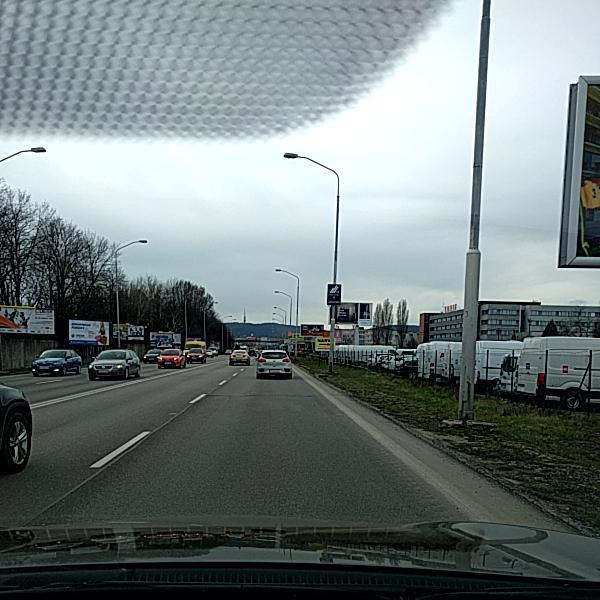

(600, 600, 3)


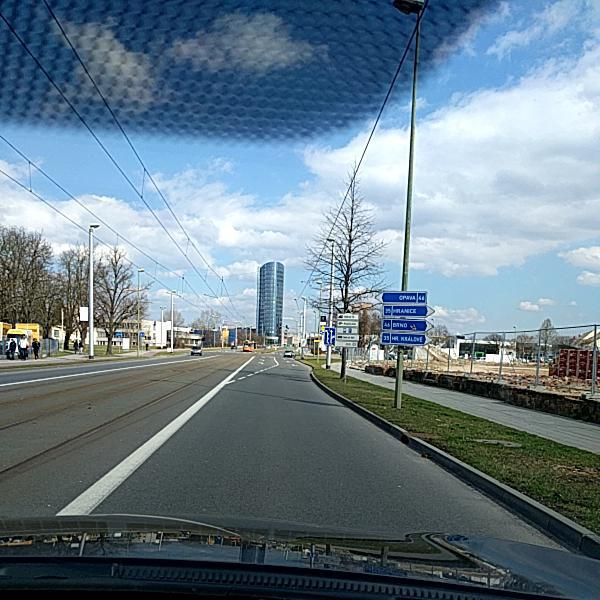

(600, 600, 3)


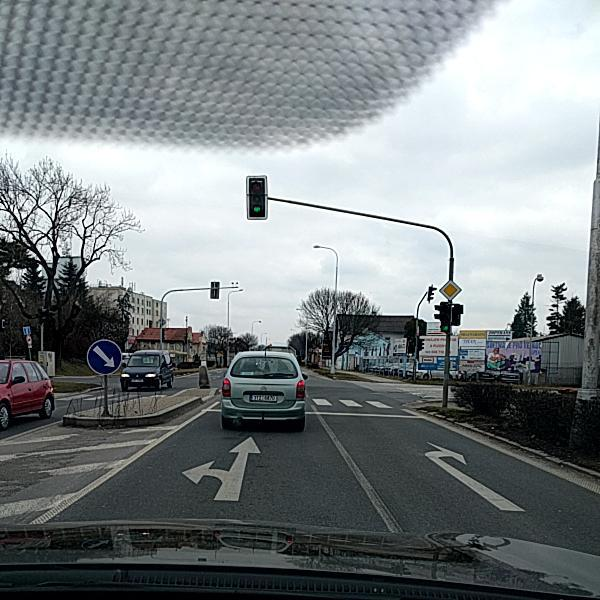

(600, 600, 3)


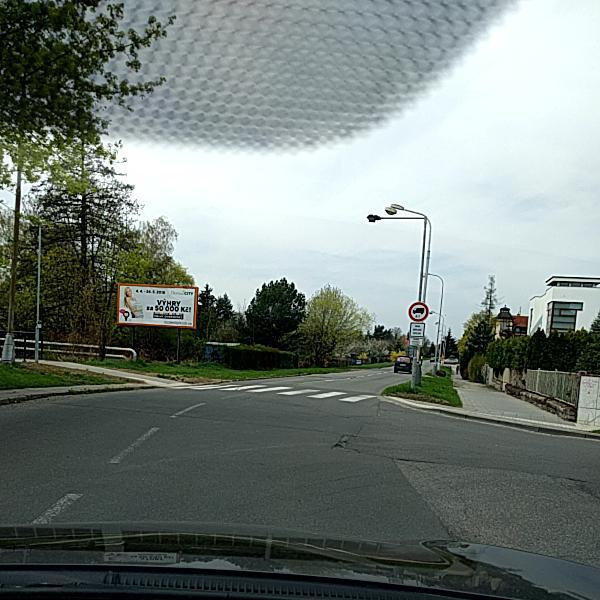

(600, 600, 3)


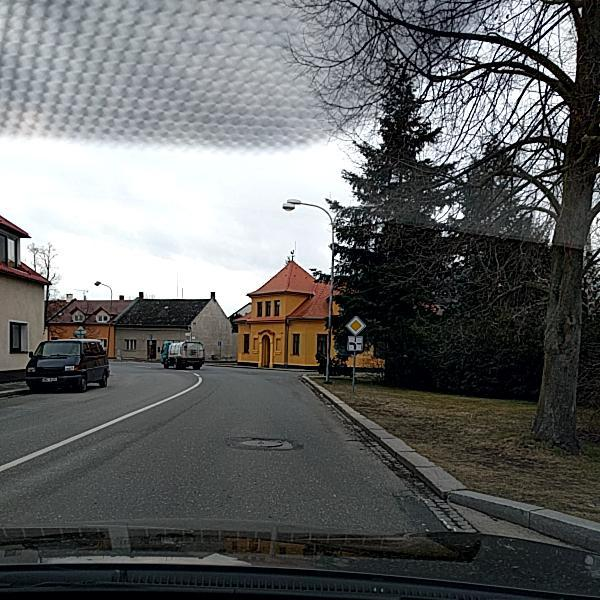

(600, 600, 3)


In [9]:
for i in range(5):
  img = cv2.imread(image_files[i])
  cv2_imshow(img)
  print(img.shape)

In [10]:
annot_files = []
annot_dirs = ['train/Czech/annotations/xmls', 'train/India/annotations/xmls', 'train/Japan/annotations/xmls']

for dir in annot_dirs:
  for xml in os.listdir(dir):
    xml = dir + '/' + xml
    annot_files.append(xml)

In [11]:
print(len(annot_files))
print(annot_files[0:5])

21041
['train/Czech/annotations/xmls/Czech_001300.xml', 'train/Czech/annotations/xmls/Czech_002857.xml', 'train/Czech/annotations/xmls/Czech_000215.xml', 'train/Czech/annotations/xmls/Czech_002958.xml', 'train/Czech/annotations/xmls/Czech_003231.xml']


In [12]:
image_files = sorted(image_files)
print(image_files[:10])

annot_files = sorted(annot_files)
print(annot_files[:10])

['train/Czech/images/Czech_000000.jpg', 'train/Czech/images/Czech_000001.jpg', 'train/Czech/images/Czech_000002.jpg', 'train/Czech/images/Czech_000006.jpg', 'train/Czech/images/Czech_000007.jpg', 'train/Czech/images/Czech_000009.jpg', 'train/Czech/images/Czech_000010.jpg', 'train/Czech/images/Czech_000011.jpg', 'train/Czech/images/Czech_000012.jpg', 'train/Czech/images/Czech_000013.jpg']
['train/Czech/annotations/xmls/Czech_000000.xml', 'train/Czech/annotations/xmls/Czech_000001.xml', 'train/Czech/annotations/xmls/Czech_000002.xml', 'train/Czech/annotations/xmls/Czech_000006.xml', 'train/Czech/annotations/xmls/Czech_000007.xml', 'train/Czech/annotations/xmls/Czech_000009.xml', 'train/Czech/annotations/xmls/Czech_000010.xml', 'train/Czech/annotations/xmls/Czech_000011.xml', 'train/Czech/annotations/xmls/Czech_000012.xml', 'train/Czech/annotations/xmls/Czech_000013.xml']


In [13]:
import pandas as pd

# create dataframe to match between image file and annotation file

df = pd.DataFrame(list(zip(image_files, annot_files)), 
                  columns=['image file', 'annotation'])

In [14]:
print(df.head())

                            image file                                     annotation
0  train/Czech/images/Czech_000000.jpg  train/Czech/annotations/xmls/Czech_000000.xml
1  train/Czech/images/Czech_000001.jpg  train/Czech/annotations/xmls/Czech_000001.xml
2  train/Czech/images/Czech_000002.jpg  train/Czech/annotations/xmls/Czech_000002.xml
3  train/Czech/images/Czech_000006.jpg  train/Czech/annotations/xmls/Czech_000006.xml
4  train/Czech/images/Czech_000007.jpg  train/Czech/annotations/xmls/Czech_000007.xml


In [15]:
df.describe()

image file                                     annotation
count                                 21041                                          21041
unique                                21041                                          21041
top     train/India/images/India_000526.jpg  train/Japan/annotations/xmls/Japan_009986.xml
freq                                      1                                              1

In [16]:
import xml.etree.ElementTree as ET

In [17]:
# xml_exs = ['train/Japan/annotations/xmls/Japan_000000.xml', 
#             'train/Japan/annotations/xmls/Japan_000004.xml', 
#             'train/Japan/annotations/xmls/Japan_000008.xml', 
#             'train/Japan/annotations/xmls/Japan_000010.xml']

tree = ET.parse('train/Japan/annotations/xmls/Japan_000008.xml')
root = tree.getroot()

In [18]:
for elem in root:
  print(elem)
  for sub in elem:
    print(sub.text)

<Element 'folder' at 0x7fa4c893d650>
<Element 'filename' at 0x7fa4c893d6b0>
<Element 'size' at 0x7fa4c893d710>
600
600
<Element 'segmented' at 0x7fa4c893d890>
<Element 'object' at 0x7fa4c893d8f0>
D44

            


In [19]:
def annotation_check(xml_file):
  tree = ET.parse(xml_file)
  root = tree.getroot()
  for elems in root:
    for e in elems:
      if ('D00' in e.text) or ('D10' in e.text) or ('D20' in e.text) or ('D40' in e.text):
        return True

In [20]:
def split_data(dataframe, column_name:str):
  cleaned_index_data = []
  for xml in dataframe[column_name]:
    checked = annotation_check(xml)
    if checked:
      index = dataframe[dataframe[column_name]==xml].index[0]
      cleaned_index_data.append(index)
  return cleaned_index_data

In [21]:
cleaned_idx = split_data(df, 'annotation')

In [22]:
print(len(cleaned_idx))

12195


In [23]:
new_df = df.loc[cleaned_idx].reset_index(drop=True)

In [24]:
print(new_df.describe())
print(new_df.head())

                                 image file                                     annotation
count                                 12195                                          12195
unique                                12195                                          12195
top     train/Japan/images/Japan_006386.jpg  train/Japan/annotations/xmls/Japan_003550.xml
freq                                      1                                              1
                            image file                                     annotation
0  train/Czech/images/Czech_000006.jpg  train/Czech/annotations/xmls/Czech_000006.xml
1  train/Czech/images/Czech_000010.jpg  train/Czech/annotations/xmls/Czech_000010.xml
2  train/Czech/images/Czech_000020.jpg  train/Czech/annotations/xmls/Czech_000020.xml
3  train/Czech/images/Czech_000021.jpg  train/Czech/annotations/xmls/Czech_000021.xml
4  train/Czech/images/Czech_000022.jpg  train/Czech/annotations/xmls/Czech_000022.xml


In [33]:
# let's draw the annotation per image

def add_bndbox(image, annotation):
  annotated_image = cv2.imread(image)
  tree = ET.parse(annotation)
  root = tree.getroot()

  for obj in root.iter('object'):
    label = obj.find('name').text
    if ('D00' in label) or ('D10' in label) or ('D20' in label) or ('D40' in label):
      box = obj.find('bndbox')
      xmin = int(box.find('xmin').text)
      xmax = int(box.find('xmax').text)
      ymin = int(box.find('ymin').text)
      ymax = int(box.find('ymax').text)

      font = cv2.FONT_HERSHEY_SIMPLEX

      cv2.putText(annotated_image, label, (xmin, ymin-10), font, 1,
                  (0, 255, 0), 2, cv2.LINE_AA)
      
      cv2.rectangle(annotated_image, (xmin, ymin), (xmax, ymax), 
                    (0, 255, 0), 3)

  return annotated_image

In [26]:
annotation_sample = new_df.sample(10).reset_index(drop=True)
annotation_sample.head()

image file                                     annotation
0  train/Japan/images/Japan_006064.jpg  train/Japan/annotations/xmls/Japan_006064.xml
1  train/India/images/India_002331.jpg  train/India/annotations/xmls/India_002331.xml
2  train/Japan/images/Japan_010683.jpg  train/Japan/annotations/xmls/Japan_010683.xml
3  train/Japan/images/Japan_000653.jpg  train/Japan/annotations/xmls/Japan_000653.xml
4  train/India/images/India_001465.jpg  train/India/annotations/xmls/India_001465.xml

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

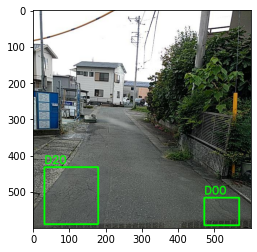

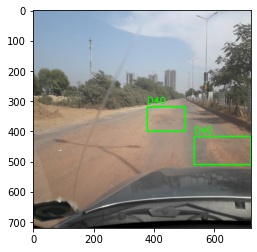

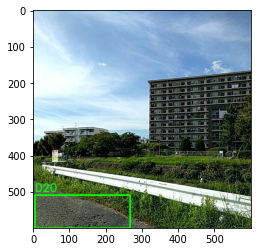

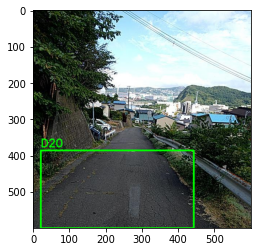

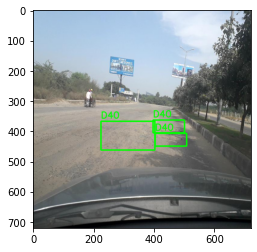

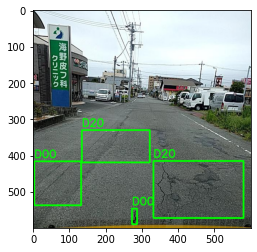

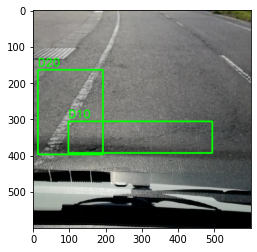

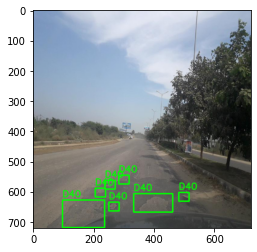

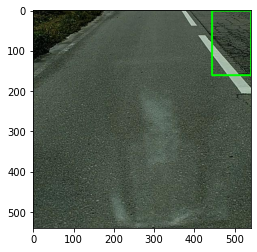

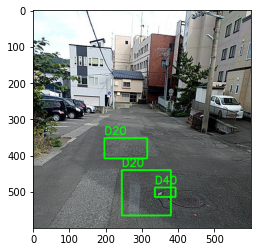

In [34]:
for i in range(len(annotation_sample)):
  img = annotation_sample['image file'][i]
  annot = annotation_sample['annotation'][i]
  annotated = add_bndbox(img, annot)
  plt.subplot(1, 1, 1)
  plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
  plt.show()